# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Loading and inspecting data
data = pd.read_csv('product_sales.csv')
data.head()


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [2]:
# Display general information about the 'sales' dataset using the info() method.
print(data.info())

print('\n')

# Display summary statistics for the 'sales' dataset using the describe() method.
display(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB
None




,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [3]:
#check for the sum of the null values in the dataframe
data.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

## Dataset Summary
Missing Values: The 'revenue' column has missing values and requires handling.

Summary Statistics: The displayed summary statistics offer insights into data distribution for analysis.

In [4]:
# Specify the column for missing values
column_to_check = 'revenue'

# Step 1: Count the number of missing values in the column
missing_values_count = data[column_to_check].isnull().sum()

# Step 2: Calculate the threshold for missing values (5 percent)
total_rows = len(data)
threshold = 0.05 * total_rows

# Step 3: Compare the count of missing values with the threshold
if missing_values_count <= threshold:
    # Step 4: If the count <= threshold, drop the rows with missing values
    data.dropna(subset=[column_to_check], inplace=True)
    print(f"Dropped rows with missing '{column_to_check}' values due to excessive missing values.")
else:
    print(f"Mising values of the '{column_to_check}' column is greater than the threshold So the '{column_to_check}' column will not be dropped.")

Mising values of the 'revenue' column is greater than the threshold So the 'revenue' column will not be dropped.


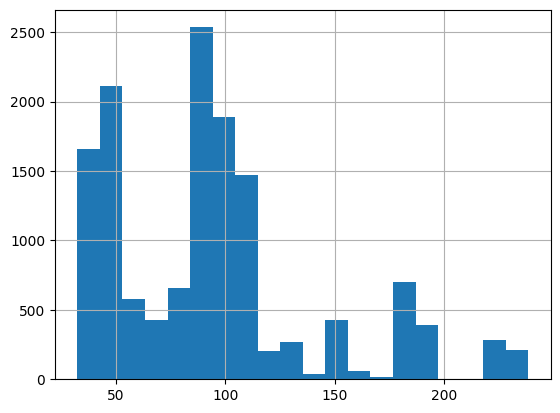

In [5]:
# Histogram plot of the null value column
data['revenue'].hist(bins=20)
plt.show()

In [6]:
data['revenue'] = data.revenue.fillna(data['revenue'].median())

## Data Analysis and Imputation
The histogram plot of the null value column showed that the data was skewed. As a result, we opted to use the median to fill the missing values in the revenue column.

According to the data description the revenue varies depending on which products were sold, and we don't have any product type related column so we can't group the revenue column by any column for the imputation.

In [7]:
# Get the list of column names in the 'sales' dataset.
columns = data.columns

# Iterate through each column in the dataset and print the unique values
for col in columns:
    unique_values = data[col].unique()
    num_of_unique_values = data[col].nunique()
    print(f"Unique values in '{col}':")
    print(unique_values)
    print(num_of_unique_values)
    print("\n")

Unique values in 'week':
[2 6 5 4 3 1]
6


Unique values in 'sales_method':
['Email' 'Email + Call' 'Call' 'em + call' 'email']
5


Unique values in 'customer_id':
['2e72d641-95ac-497b-bbf8-4861764a7097'
 '3998a98d-70f5-44f7-942e-789bb8ad2fe7'
 'd1de9884-8059-4065-b10f-86eef57e4a44' ...
 '839653cb-68c9-48cb-a097-0a5a3b2b298b'
 'e4dad70a-b23b-407c-8bd3-e32ea00fae17'
 '4e077235-7c17-4054-9997-7a890336a214']
15000


Unique values in 'nb_sold':
[10 15 11  9 13  8 12  7 14 16]
10


Unique values in 'revenue':
[ 89.5  225.47  52.55 ...  44.34  45.01  64.9 ]
6743


Unique values in 'years_as_customer':
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]
42


Unique values in 'nb_site_visits':
[24 28 26 25 22 31 23 30 21 27 32 29 20 18 19 35 16 17 33 36 34 15 37 14
 13 12 41]
27


Unique values in 'state':
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missour

In [8]:
# Filter the DataFrame based on the condition 'years_as_customer' > 39
sales_out_of_range_rows = data[data['years_as_customer'] > 39]

# Print the 'years_as_customer' column with its name
display(sales_out_of_range_rows)

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


## Unique Values Summary
- Sales Method Case: The 'sales_method' column contains unique values in both title case and lower case. Standardizing the case may be necessary for consistency.

- Email and Call Duplication: The 'email + call' unique value also appears as 'em + call,' indicating a need for data cleaning to address this duplication.

- Years As a Customer: The years as a customer column had customers with years as a customer older than the company's age of 39 years as was stated in the data description, those rows needs to be drop.

In [9]:
# Use the replace method with the dictionary
data['sales_method'] = data['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

# Convert the 'state' columns to title case for consistency, round revenue column.
data['state'] = data['state'].str.title()
data['revenue'] = round(data['revenue'],2)

# Iterate through selected columns and display their unique values.
cols = ['sales_method', 'state', 'revenue']
for col in cols:
    unique_values = data[col].unique()
    display(f"Unique values in '{col}':")
    display(unique_values)
    print("\n")

"Unique values in 'sales_method':"

array(['Email', 'Email + Call', 'Call'], dtype=object)

"Unique values in 'state':"

array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
       'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
       'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
       'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
       'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
       'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
       'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
       'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
       'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
       'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
       'Wyoming'], dtype=object)

"Unique values in 'revenue':"

array([ 89.5 , 225.47,  52.55, ...,  44.34,  45.01,  64.9 ])

In [10]:
# Check for duplicated rows
duplicates = data.duplicated()

# Count the total number of duplicates
total_duplicates = duplicates.sum()

# Print the total number of duplicate rows
print(f"Total duplicates: {total_duplicates}")

# Check for columns with empty strings
columns_with_empty_strings = data.columns[data.applymap(lambda x: x == '').any()]

# Print the columns with empty strings
print('columns with empty strings are:', columns_with_empty_strings)
print('\n')

# Select numeric columns
numeric_cols = data.select_dtypes(include=[np.number])

# Check if numeric columns contain negative values
contains_negative = (numeric_cols < 0).any().any()

if contains_negative:
    print("Numeric columns contain negative values.")
else:
    print("Numeric columns do not contain negative values.")
print('\n')

Total duplicates: 0
columns with empty strings are: Index([], dtype='object')


Numeric columns do not contain negative values.




## Data Quality Check
- Upon inspection for duplicated values, empty string, and negative values, the analysis revealed that the sales dataframe exhibits none of these issues.
- But We still need to convert the 'sales_method' column to categorical data type for efficiency.

In [11]:
# Change 'sales_method' data type to category
data['sales_method'] = data['sales_method'].astype('category')

# Display information of the dataframe and the sum of null values of each column
print(data.info())
print('\n')
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   week               15000 non-null  int64   
 1   sales_method       15000 non-null  category
 2   customer_id        15000 non-null  object  
 3   nb_sold            15000 non-null  int64   
 4   revenue            15000 non-null  float64 
 5   years_as_customer  15000 non-null  int64   
 6   nb_site_visits     15000 non-null  int64   
 7   state              15000 non-null  object  
dtypes: category(1), float64(1), int64(4), object(2)
memory usage: 835.2+ KB
None


week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


## Data Validation Analysis Summary
At the conclusion of the data validation analysis, the following improvements have been made:

- Revenue Imputation Challenge: Lack of product-type related columns for grouping revenue.
- Missing Values: Addressed missing values in 'revenue' column.
- Unique Values Cleaning: Standardized 'sales_method' case and resolved email and call duplication.
- Data Skewness: Detected skewness in revenue column; used median for missing value imputation in the revenue column.
- Years as Customer: Removed rows with customer years exceeding the company's 39-year age.
- Data Quality Check: Ensured no duplicates, empty strings, or negative values.
- Efficiency Improvement: Converted 'sales_method' column to categorical data type.

# Exploratory Analysis

In [12]:
# Define the numerical variables to identify outliers
col_vars = ['week', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']

# Define a function to identify outliers using the IQR method
def num_outliers(df):
    for col in col_vars:
        # Calculate the IQR for the column
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds for outliers as 1.5 times the IQR
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers using the IQR and create new columns for outliers
        new_col = col + '_outlier'
        df[new_col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), True, False)

    return df

# Apply the identify_outliers function
outlier_df = num_outliers(data)

# Count the number of outliers for each nutritional column
num_of_outliers = ['week_outlier', 'nb_sold_outlier', 'revenue_outlier', 'years_as_customer_outlier', 'nb_site_visits_outlier']
data[num_of_outliers].sum()

week_outlier                    0
nb_sold_outlier               586
revenue_outlier              1031
years_as_customer_outlier     533
nb_site_visits_outlier        227
dtype: int64

## The numbers represent the count of outliers detected for each respective column:
- For "nb_sold," there are 586 outliers.
- For "revenue," there are 1031 outliers.
- For "years_as_customer," there are 531 outliers.
- For "nb_site_visits," there are 227 outliers.

## Number of Customers for Each Sales Method

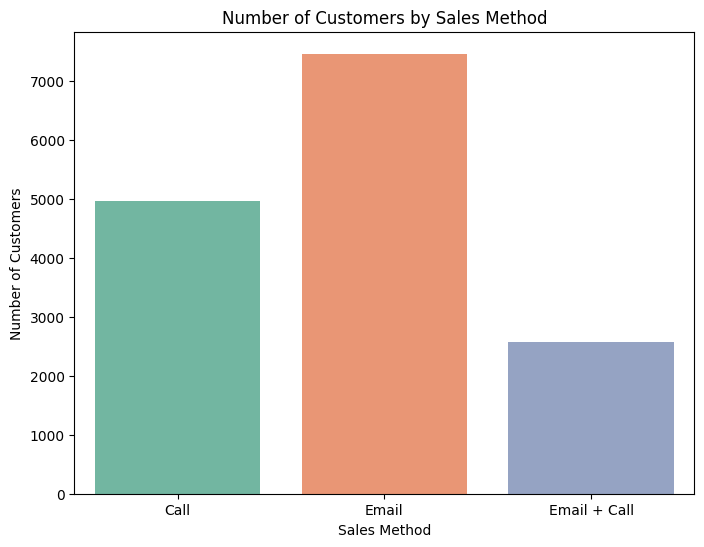

sales_method
Call            4962
Email           7466
Email + Call    2572
Name: customer_id, dtype: int64

In [13]:
# Group the data by sales method and count unique customer IDs
customer_count_by_method = data.groupby('sales_method')['customer_id'].nunique().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=customer_count_by_method, x='sales_method', y='customer_id', palette='Set2')
plt.title('Number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Number of Customers')
plt.show()

display(data.groupby('sales_method')['customer_id'].nunique())

### Based on the bar plot results:
- For the "Call" approach, there were 4,962 customers.
- For the "Email" approach, there were 7,466 customers.
- For the "Email + Call" approach, there were 2,572 customers.
- These numbers represent the count of customers for each sales approach, as determined from the bar plot

## Spread of the Overall Revenue, and for Each Sales Method

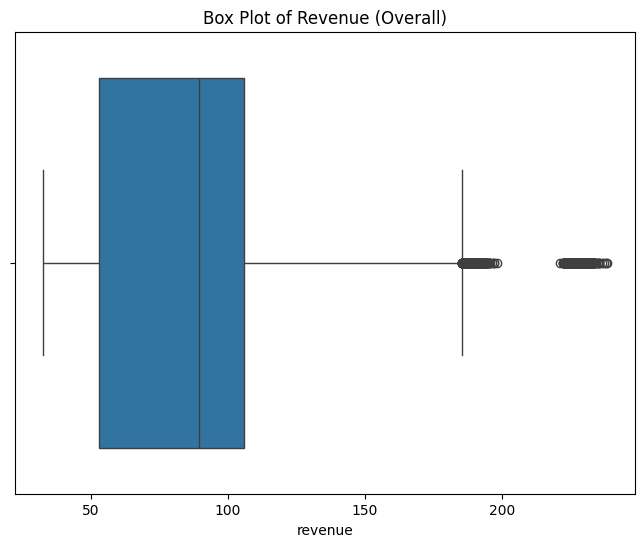

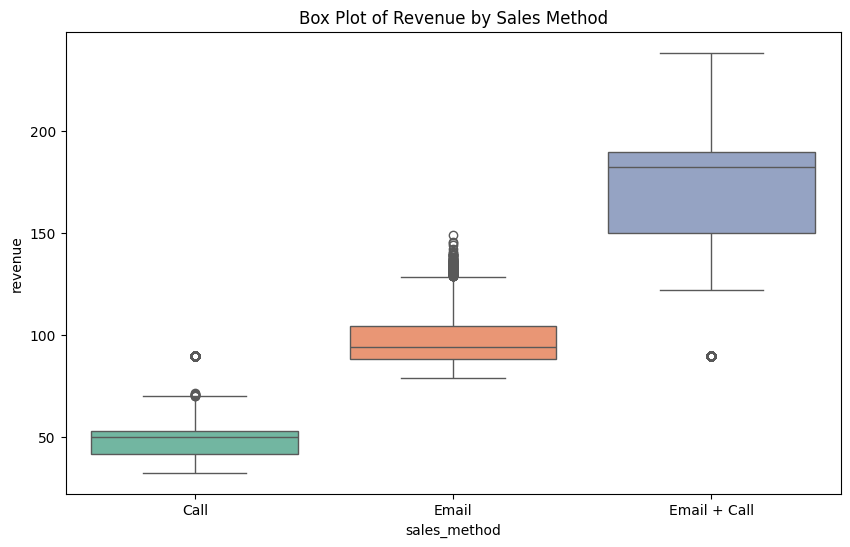

Summary Statistics for Spread of Revenue Overall:


count    15000.000000
mean        93.617401
std         45.719775
min         32.540000
25%         53.040000
50%         89.500000
75%        106.070000
max        238.320000
Name: revenue, dtype: float64



Summary Statistics for Spread of Revenue for each Method:


,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4962.0,49.125955,11.539040,32.54,41.6300,49.935,52.9775,89.50
Email,7466.0,96.571903,10.974845,78.83,88.3900,94.275,104.4600,148.97
Email + Call,2572.0,170.875657,42.084163,89.50,149.8225,182.135,189.5350,238.32


In [14]:
# Box plot for overall revenue spread
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='revenue')
plt.title('Box Plot of Revenue (Overall)')

# Box plot for revenue spread by sales method
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='sales_method', y='revenue', palette='Set2')
plt.title('Box Plot of Revenue by Sales Method')
plt.show()

print('Summary Statistics for Spread of Revenue Overall:')
display(data['revenue'].describe())
print('\n')
print('Summary Statistics for Spread of Revenue for each Method:')
display(data.groupby('sales_method')['revenue'].describe())

### Summary of Overall Spread of Revenue.
- Mean (Average): The typical revenue from sales is around $93.62.
- Maximum: The highest revenue observed in the dataset is approximately $238.32.
- Minimum: The lowest revenue observed in the dataset is about $32.54.
- Spread (Standard Deviation): Revenue values can vary, with most falling within approximately $45.72 of the average. This tells us that while some sales generate more revenue, others generate less.
- 25th Percentile: About 25% of sales have revenue below $53.04, indicating that a quarter of the sales generate less revenue.
- Median (Middle Value): The middle revenue value is about $89.50. Half of the sales generate more revenue than this, and half generate less. 
- 75th Percentile: About 75% of sales have revenue below $106.07, indicating that most sales fall below this threshold.

### Summary of Revenue Spread by Sales Method
- "Email + Call" generates the highest average revenue but with higher variability, indicating that it can result in both higher and lower revenue outcomes.
- "Email" generates moderate average revenue with moderate variability.
- "Call" generates lower average revenue with lower variability.


## Difference in Revenue over Time for each Sales Methods

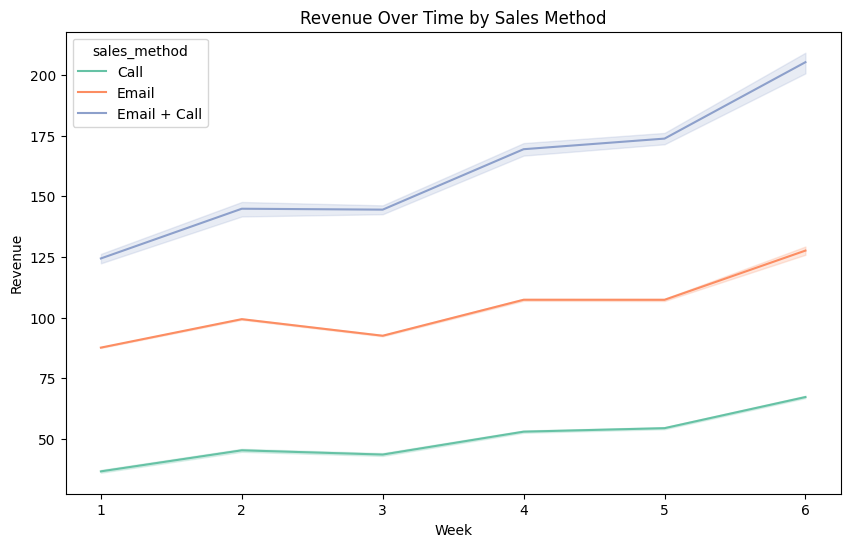

In [15]:
# Line plot for revenue over time by sales method
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='week', y='revenue', hue='sales_method', palette='Set2')
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()

### Analysis of Revenue Change Over Time
Based on the line plot provided, which shows the change in revenue over time for each sales method, here is the answer to the question: "Was there a change in revenue over time?"

- For the "Email" sales method, revenue also shows an increasing trend over the six weeks, starting at 99.94 in the first week and rising to 132.01 in the sixth week. 
- Similarly, for the "Email + Call" sales method, revenue exhibits a consistent upward trend, starting at 128.87 in the first week and reaching 225.47 in the sixth week. 
- For the "Call" sales method, revenue appears to increase gradually over the six weeks, starting at 34.98 in the first week and reaching 65.01 in the sixth week. This suggests a positive trend in revenue for this method.

Based solely on the revenue trends observed in the provided data, here's a recommendation:

Email + Call Sales Method: This method generated the highest average revenue of approximately $170.88, and it exhibited a consistent upward trend in revenue over the six-week period. While it has higher variability, it also has the potential for higher revenue outcomes.

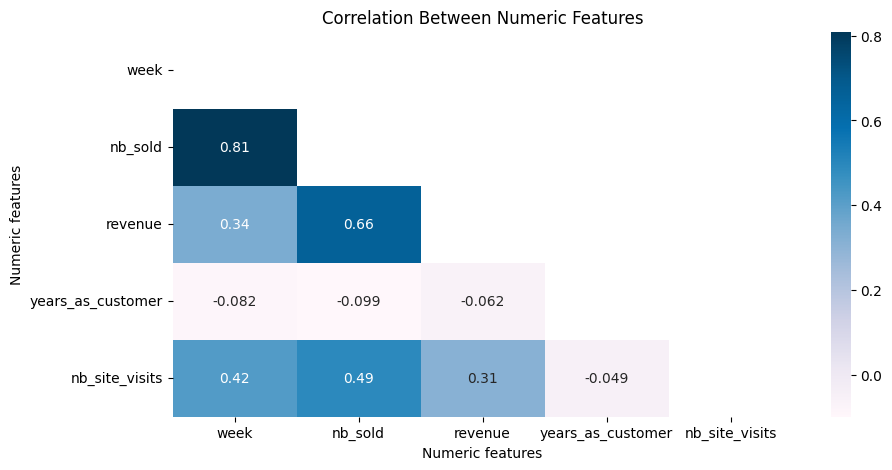

In [16]:
corr = data[col_vars].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, cmap='PuBu', mask=mask)
plt.xlabel('Numeric features')
plt.ylabel('Numeric features')
plt.title('Correlation Between Numeric Features')
plt.show()

### Pairplot and Heatmap Intepretation
From the pair plot we can visualize the relationship between each features using the sales method as the hue, to vidualize the effect of each sales method on the features relationship. below is the explanation of each feature relationship;

- Week vs. nb_sold: Strong positive correlation (0.81), suggesting that as weeks progress, more new products tend to be sold. 
- Week vs. Revenue: Moderate positive correlation (0.34), indicating that, on average, revenue increases with time, but less strongly than nb_sold. 
- Week vs. nb_site_visits: Moderate positive correlation (0.42), suggesting an increase in site visits over time. 
- Week vs. Years as Customer: Weak negative correlation (-0.08), implying that as weeks progress, average customer tenure slightly decreases. 
- nb_sold vs. Revenue: Strong positive correlation (0.66), showing that higher new product sales are associated with increased revenue. 
- Revenue vs. Years as Customer: Weak negative correlation (-0.06), indicating that longer-term customers may generate slightly less revenue.
- nb_site_visits vs. Revenue: Moderate positive correlation (0.31), suggesting that more site visits are associated with increased revenue, although less strongly than with nb_sold. 
- nb_site_visits vs. nb_sold: Strong positive correlation (0.49), meaning more site visits are linked to higher new product sales.

## Metric for the Business to Monitor
- Metric: "Weekly Revenue"
- Definition: Measures weekly income generated from sales.
- Reason for Choosing: The weekly revenue was chosen as the metric to monitor because it provides a direct measure of the business's financial performance, allowing for real-time tracking of income generated from sales, which is a critical indicator of business success.

## Metric Initial Value Based on the Current Data

In [17]:
import pandas as pd

# Assuming you have a DataFrame called 'sales' with columns 'sales_method' and 'revenue'
initial_weekly_revenue = round(data[data['week'] == 1].groupby('sales_method')['revenue'].sum().sum())

print("Initial Weekly Value:", initial_weekly_revenue)

Initial Weekly Value: 292858


### Initial Value is $292,858

Initial Weekly Revenue
= Revenue from "Call" Sales (week1) + Revenue from "Email" Sales (week1) + Revenue from "Email + Call" Sales (week1)

Summing the revenue from the three sales methods provides an aggregate measure of the business's total weekly revenue. Choosing the first week as the initial value establishes a baseline for tracking revenue growth and performance over time.

## Summary and Recommendations:
- Based on the analysis of the provided data, the following recommendations are suggested:
- The business should focus on monitoring the "Weekly Revenue Growth Rate" as a key performance metric to track changes in revenue over time. 
- Implementing a system for real-time tracking and reporting of this metric is essential for making informed decisions. 
- The analysis indicates that all three sales methods ("Call," "Email," and "Email + Call") have shown positive revenue growth trends. However, the "Email + Call" sales method has exhibited the highest average revenue and consistent upward growth. 
- Therefore, it is recommended that the business continues to emphasize and optimize the "Email + Call" sales method, as it has the potential for higher revenue outcomes.
- It's important to consider that this recommendation is based on revenue trends alone and should be complemented by a holistic assessment of other factors, such as cost-effectiveness, customer satisfaction, and overall business objectives.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation